**Denoising a synthetic signal using the SVD algorithm**

In [19]:
#Importation of necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Generation of synthetic sinus signal
t=np.linspace(0 , 1 , 1000)
f=10
phi=30
A=1.2
s=A*np.sin(2*np.pi*f*t+phi)

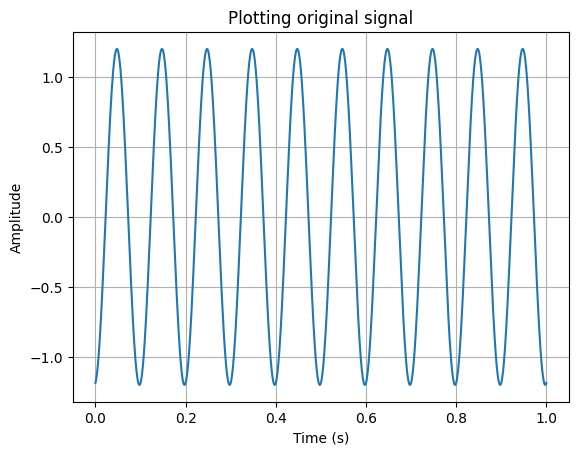

In [21]:
#Plotting original signal
plt.figure()
plt.plot(t, s)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Plotting original signal')
plt.grid(True)

In [22]:
#Generation of white noise
b=np.random.normal(0, 0.3, len(s))

In [23]:
#Adding noise to the original signal
noisy_s=s+b

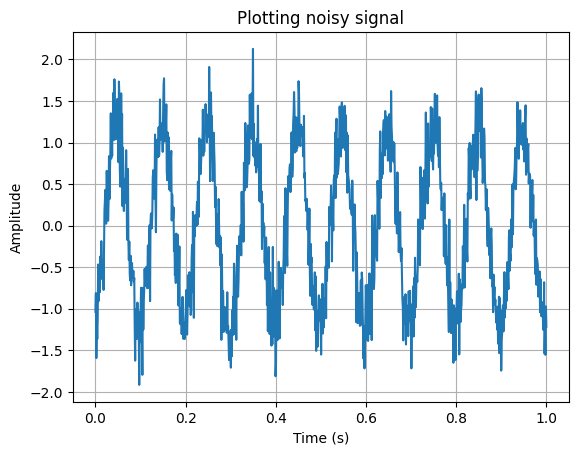

In [24]:
#Plotting noisy signal
plt.figure()
plt.plot(t, noisy_s)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Plotting noisy signal')
plt.grid(True)

In [25]:
#definition of a function that generates hankel matrix
from scipy.linalg import hankel
def create_hankel_matrix (signal, window_size):
  N=len(signal)
  if window_size>N:
    raise ValueError("Window size must be less that signal length")
  H=hankel(signal[:window_size], signal[window_size-1:])
  return H

In [26]:
#Generation of hankel matrix of the noisy signal
H=create_hankel_matrix(noisy_s, len(noisy_s)//2)

In [27]:
#Application of singular value decomposition
U, S, Vt=np.linalg.svd(H, full_matrices=False)

In [28]:
#generation of a function that uses the enerrgy criterion to determine the number of singular values to keep
def r_choose(S, threshold):
  E_t=np.sum(S**2)
  E=0
  r=0
  for i in range(len(S)):
    e=S[i]**2
    E=E+e
    r=r+1
    if E/E_t>=threshold:
      break
  return r

In [29]:
#Determination of the number of singular valuees to keep
r=r_choose(S, threshold=0.9)

In [30]:
#Filtering SVD components
U_filtered=U[:,:r]
S_filtered=S[:r]
Vt_filtered=Vt[:r, :]

In [31]:
#Calculation of denoised Hankel matrix
Hr=U_filtered@np.diag(S_filtered)@Vt_filtered

In [32]:
#generation of a function that Reconstructs denoised signal
def average_anti_diagonals(H):
    rows, cols = H.shape               # Get dimensions of H
    denoised_signal = np.zeros(rows + cols - 1)  # Result array for the 1D signal
    counts = np.zeros(rows + cols - 1)            # To count elements per anti-diagonal

    # Loop over each element of H
    for i in range(rows):
        for j in range(cols):
            denoised_signal[i + j] += H[i, j]    # Add element to corresponding anti-diagonal
            counts[i + j] += 1                    # Increment count for averaging

    # Divide sums by counts to get average per anti-diagonal
    return denoised_signal / counts

In [33]:
#Reconstrucion of denoised signal
denoised=average_anti_diagonals(Hr)

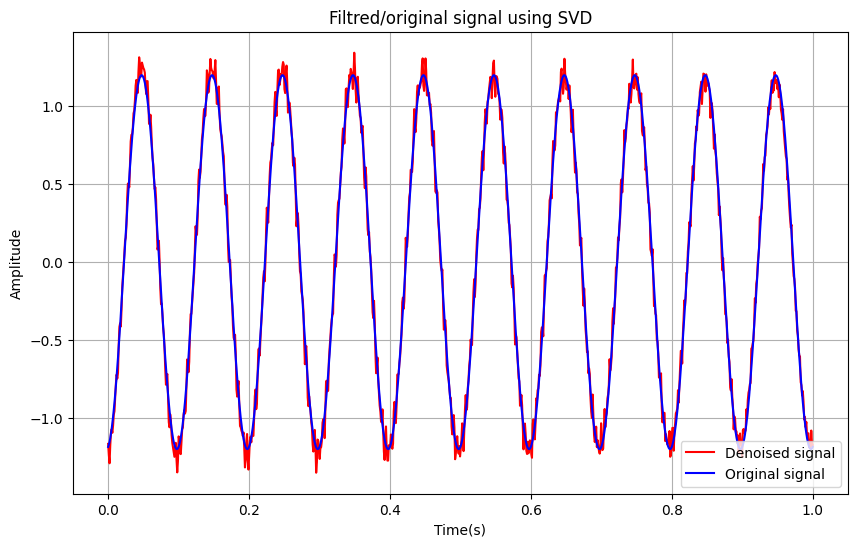

In [36]:
#Plot of filtered signal and original signal
plt.figure(figsize=(10 , 6))
plt.plot(t, denoised, color='r', label='Denoised signal')
plt.plot(t , s, color='b', label='Original signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Filtred/original signal using SVD')
plt.legend()
plt.grid(True)

In [35]:
#Testing the effeciency of the method by calculating the mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(s, denoised)
print(mse)

0.004249275508737145
